# MSDS 460 - Assignment 1 - Supporting Python Code

Steve Desilets

July 2, 2023

### Question 2

##### Problem

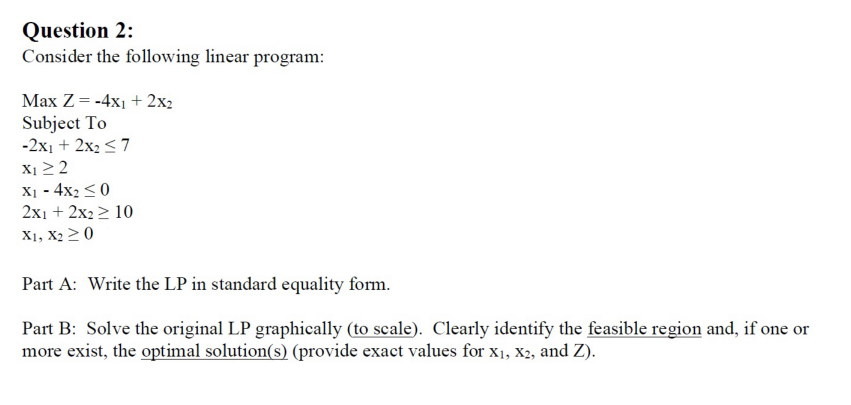

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
question = plt.imread('Question_2_Screenshot.jpg')
plt.imshow(question)
plt.axis("off")
plt.show()

##### Solution

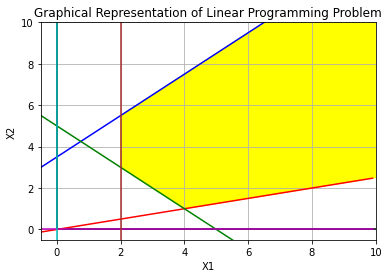

The value of the objective function when X1 = 4.0 and X2 = 1.0 is -14.0.
The value of the objective function when X1 = 2.0 and X2 = 3.0 is -2.0.
The value of the objective function when X1 = 2.0 and X2 = 5.5 is 3.0.


In [2]:
# In this code, we will graphically find the maximum value of the objective function subject to the constraints

# First, we will import the libraries that we will need for this exercise and initialize the graphical figure
# that we will use to solve our linear programming problem
import matplotlib.pyplot
import numpy
matplotlib.pyplot.figure()

# Second, we will define the constraint equations that will appear in our graph
x = numpy.arange(-0.5, 10, 0.1)
y1 = x + 3.5                      # Constraint: -2*X1 + 2X2 <= 7
y2 = 0.25 * x                     # Constraint: X1 -4X2 <= 0
y3 = -x + 5                       # Constraint: 2X1 + 2X2 >= 10
y4 = 0*x + 0                      # Constraint: X2 >= 0
                                 

# Next, we will define parameters in the graph such as axis limits, grid lines, and axis labels
matplotlib.pyplot.xlim(-0.5, 10)
matplotlib.pyplot.ylim(-0.5, 10)
matplotlib.pyplot.hlines(0, 0, 10, color = 'k')
matplotlib.pyplot.vlines(0, 0, 10, color = 'k')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.xlabel("X1")
matplotlib.pyplot.ylabel("X2")
matplotlib.pyplot.title('Graphical Representation of Linear Programming Problem')

# Next, we plot the lines that determine our feasible region
matplotlib.pyplot.plot(x, y1, color = 'b')
matplotlib.pyplot.plot(x, y2, color = 'r')
matplotlib.pyplot.plot(x, y3, color = 'g')
matplotlib.pyplot.plot(x, y4, color = 'm')
matplotlib.pyplot.axvline(0, color = 'c') # Constraint: X1 >= 0
matplotlib.pyplot.axvline(2, color = 'brown') # Constraint: X1 >= 2


# Now we must solve for the corners of our feasible region, so that we can clearly identify it in our plot.
# Notably, 3 of these corners are not actually corners of the feasible region since the feasible region extends indefinitely,
# but we will still find placeholder values that can be used just to highlight the appropriate polygon on the graph.

# Bottom Corner
a1 = numpy.array([[2, 2], [1,-4]])
b1 = numpy.array([10,0])
c1 = numpy.linalg.solve(a1,b1)

# Bottom left Corner
a2 = numpy.array([[1,0], [2,2]])
b2 = numpy.array([2,10])
c2 = numpy.linalg.solve(a2, b2)

# Top Left Corner
a3 = numpy.array([[1,0], [-2, 2]])
b3 = numpy.array([2,7])
c3 = numpy.linalg.solve(a3, b3)

# Top Corner
a4 = numpy.array([[0,1], [-2,2]])
b4 = numpy.array([10,7])
c4 = numpy.linalg.solve(a4, b4)

# Top Right Corner
a5 = numpy.array([[0,1], [1,0]])
b5 = numpy.array([10,10])
c5 = numpy.linalg.solve(a5, b5)

# Bottom Right Corner
a6 = numpy.array([[1,0], [1,-4]])
b6 = numpy.array([10,0])
c6 = numpy.linalg.solve(a6, b6)


# Next, we use the identified feasible region corners to plot the shaded feasible region on the graph
X = [c1[0], c2[0], c3[0], c4[0], c5[0], c6[0]]
Y = [c1[1], c2[1], c3[1], c4[1], c5[1], c6[1]]
matplotlib.pyplot.fill(X, Y, color = "yellow")

# We ask Python to plot the requested graph
matplotlib.pyplot.show()


# Next, we will examine the value of the objective function at each of the corners of our feasible region

def objective_calculator(x,y):
    obj_function_value = (-4 * x) + (2 * y)
    print(f"The value of the objective function when X1 = {x:.1f} and X2 = {y:.1f} is {obj_function_value:.1f}.")

objective_calculator(c1[0], c1[1])
objective_calculator(c2[0], c2[1])
objective_calculator(c3[0], c3[1])


Last, since our feasible region is unbounded, we must examine the value of the objective function as X1 approaches infinity along two of our constraint functions: 
1) X1 -4X2 <= 0

2) -2*X1 + 2X2 <= 7

We know that the objective function is defined as:

Z = -4X1 + 2X2

Solving our first constraint of interest (X1 -4X2 <0) for X2 yields the function:

0.25*X1 <= X2

Plugging 0.25*X1 for X2 in our objective function and consolidating terms yields the function:

Z = -3.5*X1

We can now find the value that Z approaches as X1 approaches infinity along the unbounded red constraint in the graph above. 

#### The limit of -3.5*X1 as X1 approaches infinity is negative infinity.




Solving our second constraint of interest (-2*X1 + 2*X2 <= 7) for X2 yields the function:

X2 <= X1 + 3.5

Plugging in X1 + 3.5 for X2 in our objective function and consolidating terms yields the function:

Z = -2X1 + 7

We can now find the value that Z approaches as X1 approaches infinity along the unbounded blue constraint in the graph above.

#### The limit of -2*X1 + 7 as X1 approaches infinity is negative infinity.

Having solved for Z at each corner of the feasible region and having found the value that Z approaches as X1 approaches infinity along each of the unbounded constraint functions, we have determined that the maximum value for Z subject to the constraints is

#### Z = 3

and this value occurs when

#### X1 = 2

and 

#### X2 = 5.5

### Question 4

##### Problem

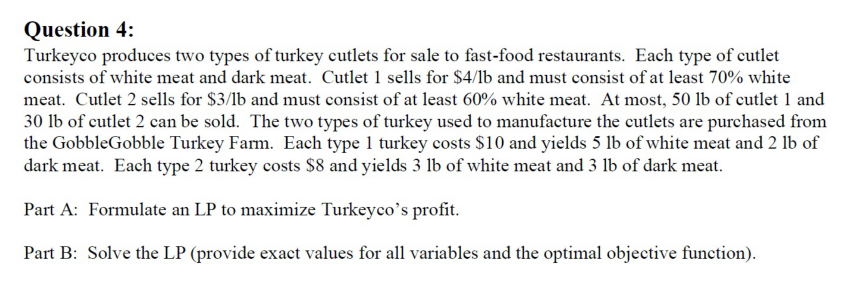

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
question = plt.imread('Question_4_Screenshot.jpg')
plt.imshow(question)
plt.axis("off")
plt.show()

##### Solution

In [4]:
# Let's solve this problem using the simplex method

# Import necessary methods and functions
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# Create linear programming variables
X_One = LpVariable("X_One", 0, None) # X_One >= 0 & no upper bound; Pounds of Cutlet 1 Produced Using Type 1 Turkeys
X_Two = LpVariable("X_Two", 0, None) # X_Two >= 0 & no upper bound; Pounds of Cutlet 1 Produced Using Type 2 Turkeys
X_Three = LpVariable("X_Three", 0, None) # X_Three >= 0 & no upper bound ; Pounds of Cutlet 2 Produced Using Type 1 Turkeys
X_Four = LpVariable("X_Four", 0, None) # X_Four >= 0 & no upper bound; Pounds of Cutlet 2 Produced Using Type 2 Turkeys

# Create the problem variable
prob4 = LpProblem("problem", LpMaximize)

# Define the constraints - remember that the lower bounds (non-negativity constraints) are defined in LpVariable above
prob4 += X_One + X_Two <= 50
prob4 += X_Three + X_Four <= 30
prob4 += ((1/70) * X_One) - ((1/5) * X_Two) >= 0 
prob4 += ((4/35) * X_Three) - ((1/10) * X_Four) >= 0

# Define the objective function to minimize
prob4 += ((18/7) * X_One) + ((8/3) * X_Two) + ((11/7) * X_Three) + ((5/3) * X_Four) 

# Solve the problem
status = prob4.solve()
LpStatus[status]

# Print the solution
print ("Optimal Solution:")
for variable in prob4.variables():
    print(variable.name, " = ", value(variable), " pounds")

print("Total Profit = $", round(value(prob4.objective),2))

Optimal Solution:
X_Four  =  16.0  pounds
X_One  =  46.666667  pounds
X_Three  =  14.0  pounds
X_Two  =  3.3333333  pounds
Total Profit = $ 177.56


### Question 5

##### Problem

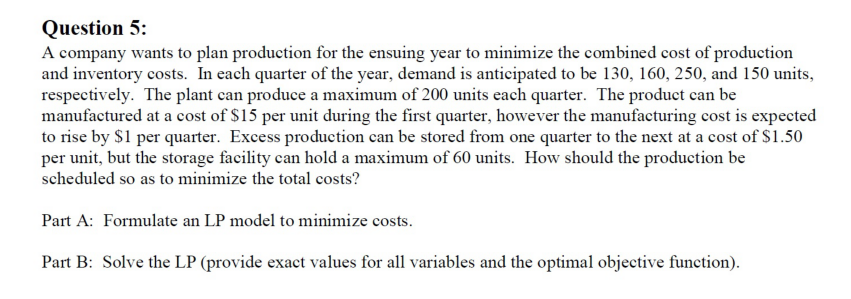

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
question = plt.imread('Question_5_Screenshot.jpg')
plt.imshow(question)
plt.axis("off")
plt.show()

##### Solution

In [6]:
# Let's solve this problem using the simplex method

# Import necessary methods and functions
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# Create linear programming variables
X_One = LpVariable("X_One", 0, None) # X_One >= 0 & no upper bound; Number of Units Produced In Q1 and Sold in Q1
X_Two = LpVariable("X_Two", 0, None) # X_Two >= 0 & no upper bound; Number of Units Produced In Q1 and Sold in Q2
X_Three = LpVariable("X_Three", 0, None) # X_Three >= 0 & no upper bound ; Number of Units Produced In Q1 and Sold in Q3
X_Four = LpVariable("X_Four", 0, None) # X_Four >= 0 & no upper bound; Number of Units Produced In Q1 and Sold in Q4

X_Five = LpVariable("X_Five", 0, None) # X_Five >= 0 & no upper bound; Number of Units Produced In Q2 and Sold in Q2
X_Six = LpVariable("X_Six", 0, None) # X_Six >= 0 & no upper bound; Number of Units Produced In Q2 and Sold in Q3
X_Seven = LpVariable("X_Seven", 0, None) # X_Seven >= 0 & no upper bound ; Number of Units Produced In Q2 and Sold in Q4

X_Eight = LpVariable("X_Eight", 0, None) # X_Eight >= 0 & no upper bound; Number of Units Produced In Q3 and Sold in Q3
X_Nine = LpVariable("X_Nine", 0, None) # X_Nine >= 0 & no upper bound; Number of Units Produced In Q3 and Sold in Q4

X_Ten = LpVariable("X_Ten", 0, None) # X_Ten >= 0 & no upper bound; Number of Units Produced In Q4 and Sold in Q4

# Create the problem variable
prob = LpProblem("problem", LpMinimize)

# Define the constraints - remember that the lower bounds (non-negativity constraints) are defined in LpVariable above
prob += X_One >= 130
prob += X_Two + X_Five >= 160
prob += X_Three + X_Six + X_Eight >= 250
prob += X_Four + X_Seven + X_Nine + X_Ten >= 150

prob += X_One + X_Two + X_Three + X_Four <= 200
prob += X_Five + X_Six + X_Seven <= 200
prob += X_Eight + X_Nine <= 200
prob += X_Ten <= 200

prob += X_Two + X_Three + X_Four <= 60
prob += X_Three + X_Four + X_Six + X_Seven <= 60
prob += X_Four + X_Seven + X_Nine <= 60

# Define the objective function to minimize
prob += (15 * X_One) + (16.5 * X_Two) + (18 * X_Three) + (19.5 * X_Four) + (16 * X_Five) + (17.5 * X_Six) + (19 * X_Seven) + (17 * X_Eight) + (18.5 * X_Nine) + (18 * X_Ten)

# Solve the problem
status = prob.solve()
LpStatus[status]

# Print the solution
print ("Optimal Solution:")
for variable in prob.variables():
    print(variable.name, " = ", value(variable), " units")

print("Total Cost = $", round(value(prob.objective),2))

Optimal Solution:
X_Eight  =  200.0  units
X_Five  =  160.0  units
X_Four  =  0.0  units
X_Nine  =  0.0  units
X_One  =  130.0  units
X_Seven  =  0.0  units
X_Six  =  40.0  units
X_Ten  =  150.0  units
X_Three  =  10.0  units
X_Two  =  0.0  units
Total Cost = $ 11490.0
